# map of the first baroclinic Rossby Radius of Deformation

integrate $N^2$ and compute that from vertical PD gradient (centered difference of neutral density is best)

$$ \lambda_1 = \frac{1}{|f|\pi} \int^{0}_{-H} N(z') dz'$$

from Chelton et al. (1998) Eq. (2.4).

In [1]:
import os
import sys
import numpy as np
import xesmf as xe
import xarray as xr
import cmocean
import cartopy
import cartopy.crs as ccrs
import matplotlib
import matplotlib.pyplot as plt

In [2]:
sys.path.append("..")
%matplotlib inline
matplotlib.rc_file('../rc_file')
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
%load_ext autoreload
%autoreload 2

In [ ]:
from grid import generate_lats_lons
from maps import add_cyclic_rectangular
from paths import path_results, path_prace, file_ex_ocn_ctrl, file_ex_ocn_lpd, file_RMASK_ocn, file_ex_ocn_rect, file_HadISST, file_ex_atm_lpd, file_ex_atm_ctrl
from timeseries import IterateOutputCESM
from xr_DataArrays import xr_DZ

In [4]:
dsl = xr.open_dataset(file_ex_ocn_lpd, decode_times=False)
dsh = xr.open_dataset(file_ex_ocn_ctrl, decode_times=False)
dal = xr.open_dataset(file_ex_atm_lpd, decode_times=False)
dah = xr.open_dataset(file_ex_atm_ctrl, decode_times=False)

## Bathymetry

In [5]:
DZ_ocn = xr_DZ('ocn')
DZ_low = xr_DZ('ocn_low')
hl = add_cyclic_rectangular((dal.PHIS/9.81).squeeze())
hh = add_cyclic_rectangular((dah.PHIS/9.81).squeeze())

In [6]:
# plt.figure(figsize=(9, 9))
# ax = plt.axes(projection=cartopy.crs.TransverseMercator(-5))
# ax.set_extent ((-25, 15, 33,60), cartopy.crs.PlateCarree())
# hh.plot(ax=ax, vmin=0, vmax=6000, cmap='terrain', transform=ccrs.PlateCarree())
# ax.coastlines(resolution='110m')
# ax.gridlines()

axis 1
axis 2
axis 3
CPU times: user 50.5 s, sys: 7.56 s, total: 58.1 s
Wall time: 59.9 s


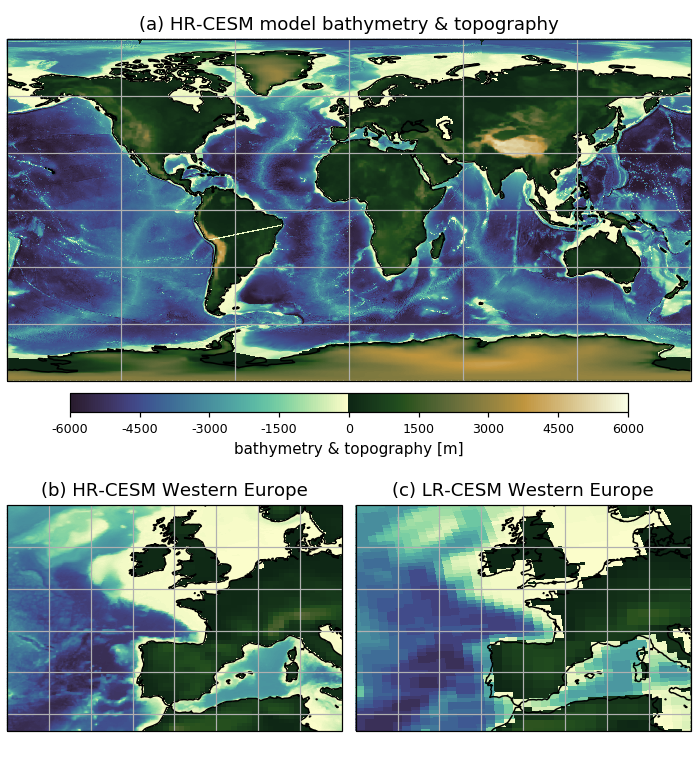

In [7]:
%%time
kw = dict(vmin=-6000, vmax=6000, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('cmo.topo'))  #,24
f = plt.figure(figsize=(6.4,7))

print('axis 1')
ax = f.add_axes([.01,.5,.98,.45], projection=ccrs.PlateCarree())
ax.set_title('(a) HR-CESM model bathymetry & topography')
ax.pcolormesh(hh.lon, hh.lat, hh, **kw)
im = ax.pcolormesh(dsh.TLONG, dsh.TLAT, -DZ_ocn.sum('z_t').where(dsh.REGION_MASK>0), **kw)
ax.coastlines(resolution='110m')
ax.gridlines()

# colorbar
ax = f.add_axes([.1,.46,.8,.025])
plt.colorbar(im, cax=ax, ticks=np.arange(-6000,6001,1500) ,format='%g', orientation='horizontal', label=r'bathymetry & topography [m]')

print('axis 2')
# ax = f.add_axes([.01,0,.48,.38], projection=ccrs.TransverseMercator(-5))  # nice, but super slow
ax = f.add_axes([.01,0,.48,.38], projection=ccrs.PlateCarree(-5))
ax.set_title('(b) HR-CESM Western Europe')
ax.set_extent ((-25, 15, 33,60), crs=ccrs.PlateCarree())
ax.pcolormesh(hh.lon, hh.lat, hh, **kw)
ax.pcolormesh(dsh.TLONG, dsh.TLAT, -DZ_ocn.sum('z_t').where(dsh.REGION_MASK>0), **kw)
ax.coastlines(resolution='50m')
ax.gridlines()

print('axis 3')
# ax = f.add_axes([.51,0,.48,.38], projection=ccrs.TransverseMercator(-5))
ax = f.add_axes([.51,0,.48,.38], projection=ccrs.PlateCarree(-5))
ax.set_title('(c) LR-CESM Western Europe')
ax.set_extent ((-25, 15, 33,60), crs=ccrs.PlateCarree())
ax.pcolormesh(hl.lon, hl.lat, hl, **kw)
ax.pcolormesh(dsl.TLONG, dsl.TLAT, -DZ_low.sum('z_t').where(dsl.REGION_MASK>0), **kw)
ax.coastlines(resolution='50m')
ax.gridlines()

plt.savefig(f'{path_results}/thesis/2_topo', dpi=600)

In [ ]:
%%time
kw = dict(vmin=-6000, vmax=6000, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('cmo.topo',24))
f = plt.figure(figsize=(6.4,7))

print('axis 1')
ax = f.add_axes([.01,.5,.98,.45], projection=ccrs.PlateCarree())
ax.set_title('(a) HR-CESM model bathymetry & topography')
ax.pcolormesh(hh.lon, hh.lat, hh, **kw)
im = ax.pcolormesh(dsh.TLONG, dsh.TLAT, -DZ_ocn.sum('z_t').where(dsh.REGION_MASK>0), **kw)
ax.coastlines(resolution='110m')
ax.gridlines()

# colorbar
ax = f.add_axes([.1,.46,.8,.025])
plt.colorbar(im, ax=ax, ticks=np.arange(-6000,6001,1500) ,format='%g', orientation='horizontal', label=r'bathymetry & topography [m]')

print('axis 2')
ax = f.add_axes([.01,0,.48,.38], projection=ccrs.TransverseMercator(-5))  # nice, but super slow
# ax = f.add_axes([.01,0,.48,.38], projection=ccrs.PlateCarree(-5))
ax.set_title('(b) HR-CESM Western Europe')
ax.set_extent ((-25, 15, 33,60), crs=ccrs.PlateCarree())
ax.pcolormesh(hh.lon, hh.lat, hh, **kw)
ax.pcolormesh(dsh.TLONG, dsh.TLAT, -DZ_ocn.sum('z_t').where(dsh.REGION_MASK>0), **kw)
ax.coastlines(resolution='50m')
ax.gridlines()

print('axis 3')
ax = f.add_axes([.51,0,.48,.38], projection=ccrs.TransverseMercator(-5))
# ax = f.add_axes([.51,0,.48,.38], projection=ccrs.PlateCarree(-5))
ax.set_title('(c) LR-CESM Western Europe')
ax.set_extent ((-25, 15, 33,60), crs=ccrs.PlateCarree())
ax.pcolormesh(hl.lon, hl.lat, hl, **kw)
ax.pcolormesh(dsl.TLONG, dsl.TLAT, -DZ_low.sum('z_t').where(dsl.REGION_MASK>0), **kw)
ax.coastlines(resolution='50m')
ax.gridlines()

plt.savefig(f'{path_results}/thesis/2_topo2', dpi=600)

axis 1
axis 2


/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: The default value for the *approx* keyword argument to TransverseMercator will change from True to False after 0.18.


axis 3


/home/ajueling/.conda/envs/CESM/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: The default value for the *approx* keyword argument to TransverseMercator will change from True to False after 0.18.


## Rossby radius and resolution

In [ ]:
# dsl.z_t.shift(z_t=1) # plus 1
PD_ctrl = xr.open_dataset(f'{path_prace}/ctrl/ocn_yrly_TEMP_PD_0200.nc').PD
PD_lpd = xr.open_dataset(f'{path_prace}/lpd/ocn_yrly_TEMP_PD_0500.nc').PD

In [ ]:
def l1(ds, PD=None):
    """ first baroclinic Rossby radius in [m] """
    if PD is not None:
        PD = ds.PD
    f = 2*2*np.pi/(24*3600)*np.sin(ds.TLAT*np.pi/180)
    dz = (ds.z_t.shift(z_t=-1)-ds.z_t.shift(z_t=1))
    dz[0], dz[-1] = ds.z_t[1]-ds.z_t[0], ds.z_t[-1]-ds.z_t[-2]
    drhodz = 1e5*((PD.shift(z_t=1)-PD.shift(z_t=-1))/dz).squeeze()    
    drhodz[0,:,:] = 1e5*((PD[0,0,:,:]-PD[0,1,:,:])/dz[0]).values
    drhodz[-1,:,:] = 1e5*((PD[0,-2,:,:]-PD[0,-1,:,:])/dz[-1]).values
    drhodz = xr.where(np.isnan(drhodz),0,drhodz)
    N = np.sqrt(-9.81/1023*drhodz)
    return 1/np.pi/np.abs(f)*(N*ds.dz/1e2).sum('z_t')

Ldl = l1(dsl, PD=PD_lpd)
Ldh = l1(dsh, PD=PD_ctrl)

In [ ]:
def eff_grid_size(ds):
    return np.sqrt((ds.DXT**2+ds.DYT**2)/2)*1e-5

In [ ]:
# regridding for better plotting results
RMASK_ocn = xr.open_dataarray(file_RMASK_ocn, decode_times=False).rename({'TLAT':'lat','TLONG':'lon'})
# replace NaNs in continents with values from original grid file
lats,lons = generate_lats_lons('ocn')
RMASK_ocn['lat'].values = lats
RMASK_ocn['lon'].values = lons

ds_out = xe.util.grid_global(.4, .4)
regridder = xe.Regridder(RMASK_ocn, ds_out, 'bilinear', reuse_weights=True, periodic=True)

In [ ]:
Ldr = regridder(Ldh)
mask = xr.where(regridder(RMASK_ocn)>0,1,0)*(xr.where(Ldr.lat<5,0,1)+xr.where(Ldr.lat>-5,0,1))
mask2 = (xr.where(Ldl.TLAT<5,0,1)+xr.where(Ldl.TLAT>-5,0,1))
El = eff_grid_size(dsl)
Er = regridder(eff_grid_size(dsh))

In [ ]:
print(f'mean grid size: HR {Er.mean().values:.2f} km;   LR {El.mean().values:.2f} km')
print(f'median grid size: HR {Er.median().values:.2f} km;   LR {El.median().values:.2f} km')

In [ ]:
f = plt.figure(figsize=(6.4, 8), constrained_layout=False)
proj = ccrs.EckertI(central_longitude=210)
kw = dict(transform=ccrs.PlateCarree(), shading='auto', norm=matplotlib.colors.LogNorm(vmin=2, vmax=200), cmap=plt.get_cmap('Spectral_r',30)) # 'twilight_shifted', 'BrBG_r'
kw2 = dict(transform=ccrs.PlateCarree(), shading='auto', norm=matplotlib.colors.LogNorm(vmin=0.1, vmax=10), cmap=plt.get_cmap('RdYlGn',15)) # 'twilight_shifted'

def axplot(ax, title):
    ax.add_feature(cartopy.feature.LAND, zorder=2, facecolor='grey')
    ax.coastlines(resolution='110m', lw=.5)
    ax.gridlines(lw=.5)
    ax.set_global()
    ax.set_title(title)
    return

ax = f.add_axes([0,.5,1,1/2], projection=proj)
ax.pcolormesh(Ldr.lon, Ldr.lat, Ldr.where(mask)/1e3, **kw)
axplot(ax, r'(a) 1st baroclinic Rossby radius $L_D$')


ax = f.add_axes([0,.265,.5,1/4], projection=proj)
ax.pcolormesh(Er.lon, Er.lat, Er, **kw)
axplot(ax, r'(b) HR-CESM $\tilde{\Delta}$  ')

ax = f.add_axes([.5,.265,.5,1/4], projection=proj)
im = ax.pcolormesh(dsl.TLONG, dsl.TLAT, El, **kw)
axplot(ax, r'  (c) LR-CESM $\tilde{\Delta}$')

ax = f.add_axes([.375,.52,.25,.015])
cb = plt.colorbar(im, cax=ax, ticks=[2,5,10,20,50,100,200], format='%.0f', orientation='horizontal', label=r'$L_D$, $\tilde{\Delta}$  [km]')
cb.ax.minorticks_off()



ax = f.add_axes([0,0,.5,1/4], projection=proj)
ax.pcolormesh(Er.lon, Er.lat, (Ldr/Er/1e3).where(mask), **kw2)
axplot(ax, '(d) HR-CESM ratio  ')

ax = f.add_axes([.5,0,.5,1/4], projection=proj)
im = ax.pcolormesh(dsl.TLONG, dsl.TLAT, (Ldl/El/1e3).where(mask2), **kw2)
axplot(ax, '  (e) LR-CESM ratio')


ax = f.add_axes([.375,.255,.25,.015])
formatter = matplotlib.ticker.LogFormatter(10, labelOnlyBase=False)
xticks = [1/10,1/5,1/2,1,2,5,10]
cb = plt.colorbar(im, cax=ax,ticks=xticks,format='%g', orientation='horizontal', label=r'$L_D/\tilde{\Delta}$')
cb.ax.minorticks_off()
plt.savefig(f'{path_results}/thesis/2_grid', dpi=600)